In [6]:
import os
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from ultralytics import YOLO

from utils.edge import bounding_teeth_on_origin

load_dotenv()
matplotlib.use('module://matplotlib_inline.backend_inline')

%matplotlib inline

YOLO_model_dir = Path(os.getenv('YOLO_MODEL_DIR'))
data_dir = Path(os.getenv('DATASET_DIR')) / 'DENTEX CHALLENGE 2023'


In [7]:
from utils.data import DentexDataset

dataset = DentexDataset(root_dir=data_dir)

len(dataset)


634

In [8]:
model = YOLO(YOLO_model_dir / '8-bound-v8.pt')

model



0: 320x640 1 13, 1 17, 1 23, 1 27, 1 33, 2 37s, 1 43, 1 47, 59.7ms
Speed: 2.3ms preprocess, 59.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


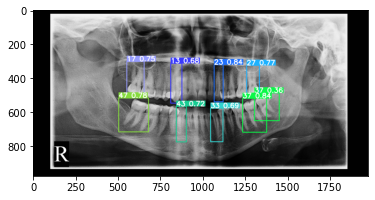

In [9]:
results = model(dataset[0][0])

plot = results[0].plot()

plt.imshow(plot)
plt.show()


In [10]:
teeth_region = bounding_teeth_on_origin(results, rotation_fix=False, yolov8=True)


KeyError: 'number'